In [1]:
import wbdata
import pandas as pd
import pandas_profiling
import datetime
import quandl
%config IPCompleter.greedy=True
import pandas_datareader




# Monthly data - currency crisis
    

In [2]:

### Inspecting world bank  Apis

wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [3]:

wbdata.get_indicator(source=6)

BM.GSR.TOTL.CD     	Imports of goods, services and primary income (BoP, current US$)
BN.CAB.XOKA.CD     	Current account balance (BoP, current US$)
BX.GRT.EXTA.CD.DT  	Grants, excluding technical cooperation (current US$)
BX.GRT.TECH.CD.DT  	Technical cooperation grants (current US$)
BX.GSR.TOTL.CD     	Exports of goods, services and primary income (BoP, current US$)
BX.KLT.DINV.CD.DT  	Foreign direct investment, net inflows in reporting economy (DRS, current US$)
BX.KLT.DREM.CD.DT  	Primary income on FDI, payments (current US$)
BX.PEF.TOTL.CD.DT  	Portfolio investment, equity (DRS, current US$)
BX.TRF.PWKR.CD.DT  	Personal remittances, received (current US$)
DT.AMT.BLAT.CD     	PPG, bilateral (AMT, current US$)
DT.AMT.BLAT.GG.CD  	GG, bilateral (AMT, current US$)
DT.AMT.BLAT.OPS.CD 	OPS, bilateral (AMT, current US$)
DT.AMT.BLAT.PRVG.CD	PRVG, bilateral (AMT, current US$)
DT.AMT.BLAT.PS.CD  	PS, bilateral (AMT, current US$)
DT.AMT.BLTC.CD     	PPG, bilateral concessional (AMT, current U

In [4]:
### fecthing country names from IMF database to get all ISO codes
countrycodes = pd.read_csv('coucodes.csv', delimiter = ';', encoding = "ISO-8859-1")
countrycodes = countrycodes[["IMF Name", "ISO Code", "ISO2 Code"]]
countrycodes.reset_index(level=0, inplace=True)
countrycodes = countrycodes.rename(columns={'IMF Name': 'country'})


In [5]:
countrycodes


,index,country,ISO Code,ISO2 Code
0,0,Afghanistan,AFG,AF
1,1,Albania,ALB,AL
2,2,Algeria,DZA,DZ
3,3,Angola,AGO,AO
4,4,Argentina,ARG,AR
5,5,Armenia,ARM,AM
6,6,Australia,AUS,AU
7,7,Austria,AUT,AT
8,8,Azerbaijan,AZE,AZ
9,9,The Bahamas,BHS,BH


In [6]:
#downloading data from worldbank

from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = ["DPANUSLCU", "TOT", "TOTRESV","UNEMPSA_", "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 2010, end = 2020, freq = "M")
worldbank_data2 = pandas_datareader.wb.download(indicator = ["DPANUSLCU", "TOT", "TOTRESV","UNEMPSA_",  "IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1999, end = 2009, freq = "M")
worldbank_data3 = pandas_datareader.wb.download(indicator = ["DPANUSLCU", "TOT", "TOTRESV","UNEMPSA_","IPTOTSAKD", "DXGSRMRCHSAKD","DSTKMKTXD", "DMGSRMRCHSAKD","CPTOTSAXN"], country = countrycodes["ISO Code"], start = 1990, end = 1998, freq = "M")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])

worldbank_data.reset_index(inplace=True)


In [7]:
worldbank_data_conc = pd.merge(worldbank_data, countrycodes, on="country")



In [8]:
#Get missing data per country. This is the basic data that will be used, so we will define a arbitrary maximum threshold of missing values.

def count_missing(frame):
    return (frame.shape[0] * frame.shape[1]) - frame.count().sum()

nan_by_country = worldbank_data_conc.groupby("country").apply(count_missing)

#Threshold
selected_countries = nan_by_country[nan_by_country < 1500]
selected_countries

country
Algeria            1147
Argentina           642
Armenia            1331
Australia           452
Austria             705
Bangladesh         1447
Belgium             133
Bolivia            1450
Brazil              238
Bulgaria            976
Canada              134
Chile               474
China               670
Colombia            805
Costa Rica         1315
Croatia            1020
Cyprus             1445
Czech Republic      417
Denmark             363
Ecuador            1145
El Salvador        1413
Estonia             468
Finland             170
France              147
Germany             134
Greece              632
Hungary             417
Iceland            1197
India               895
Indonesia           621
                   ... 
Morocco            1382
Netherlands          61
New Zealand        1184
Nigeria            1482
Norway              457
Oman               1462
Pakistan            967
Peru                244
Philippines         137
Poland              207
Portugal

In [9]:
#Subsetting the original data based on the definition above
selected_worldbank_data = worldbank_data_conc[worldbank_data_conc["country"].isin(selected_countries.index)]


In [25]:
# Example: loading IMF data into pandas
#Monthly data
# Import libraries
import requests
import pandas as pd

#FOr now we are removing Ireland because an aparent error of the api
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/M.AR+AU+AT+BE+BR+BG+CA+CL+CH+CO+HR+CZ+DK+EE+FI+FR+DE+GR+HK+HU+IN+ID+IS+IT+JP+JO+KR+LV+LU+MY+MX+NL+NO+PK+PE+PH+PL+PT+NA+RU+SA+SG+SK+SL+ZA+ES+SE+CH+TW+TH+TN+TR+UG+GB+US+VE.RAFAGOLDV_OZT+BCAXF_BP6_USD+RAXG_USD+PCTOT.?startPeriod=1990&endPeriod=2020'

# Get data from the above URL using the requests package
data = requests.get(url).json()

### Attention ! If you add variables, you need to restart the kernel otherwise there will be an error. 

In [ ]:
### Needed variables

M2 Multiplier
Domestic credit / gdp
domestic real interest rate
lending-depoist rate ratio
"excess" M1 balances
M2/reserves
bank deposits
exports (WB) ok 
imports (WB) ok
terms of trade  (WB) ok
real exchange rate (WB) ok
fx reserves ok
real interest rate differential 
output (WB or IMF) ok
stock returns (WB) ok 
short-term foreign debt
foreign debt 
world real interest rate
credit gap
equity price gap
output gap 
real effective exchange rate (WB) ok
current account / gdp 
commodity terms of trade index (IMF) ok




In [11]:
### Preparing data for loop

len(data['CompactData']['DataSet']['Series'])-1


107

In [12]:
#### stacking IMF data and creating a dataframe
stack = []
data2 = pd.DataFrame()
for x in range(len(data['CompactData']['DataSet']['Series'])-1):
    data2 = pd.DataFrame(data['CompactData']['DataSet']['Series'][x]["Obs"])[["@OBS_VALUE", "@TIME_PERIOD"]]
    data2["country"] = data['CompactData']['DataSet']['Series'][x]["@REF_AREA"]
    data2["indicator"] = data['CompactData']['DataSet']['Series'][x]["@INDICATOR"]
    stack.append(data2)
stack = pd.concat(stack)

In [13]:
stack = stack.set_index(["@TIME_PERIOD", 'country', 'indicator']).unstack(level=-1)
stack.columns = stack.columns.droplevel(0)

stack.reset_index(inplace=True)
stack["@TIME_PERIOD"] = stack["@TIME_PERIOD"].str.replace("-", "M")

stack = stack.rename(columns={'@TIME_PERIOD': 'year', "country": "ISO2 Code"})
#Next: Analyze the missing data and data range

In [14]:
stack = stack.set_index(["ISO2 Code", "year"])
selected_worldbank_data = selected_worldbank_data.set_index(["ISO2 Code", "year"])

In [15]:
### Merging IMF and WB database
full_data = selected_worldbank_data.join(stack, how = "left")


In [20]:
## excel style spreadsheet inside python
import qgrid
qgrid_widget = qgrid.show_grid(full_data, show_toolbar = True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [ ]:
### Profiling data 
full_data.profile_report()

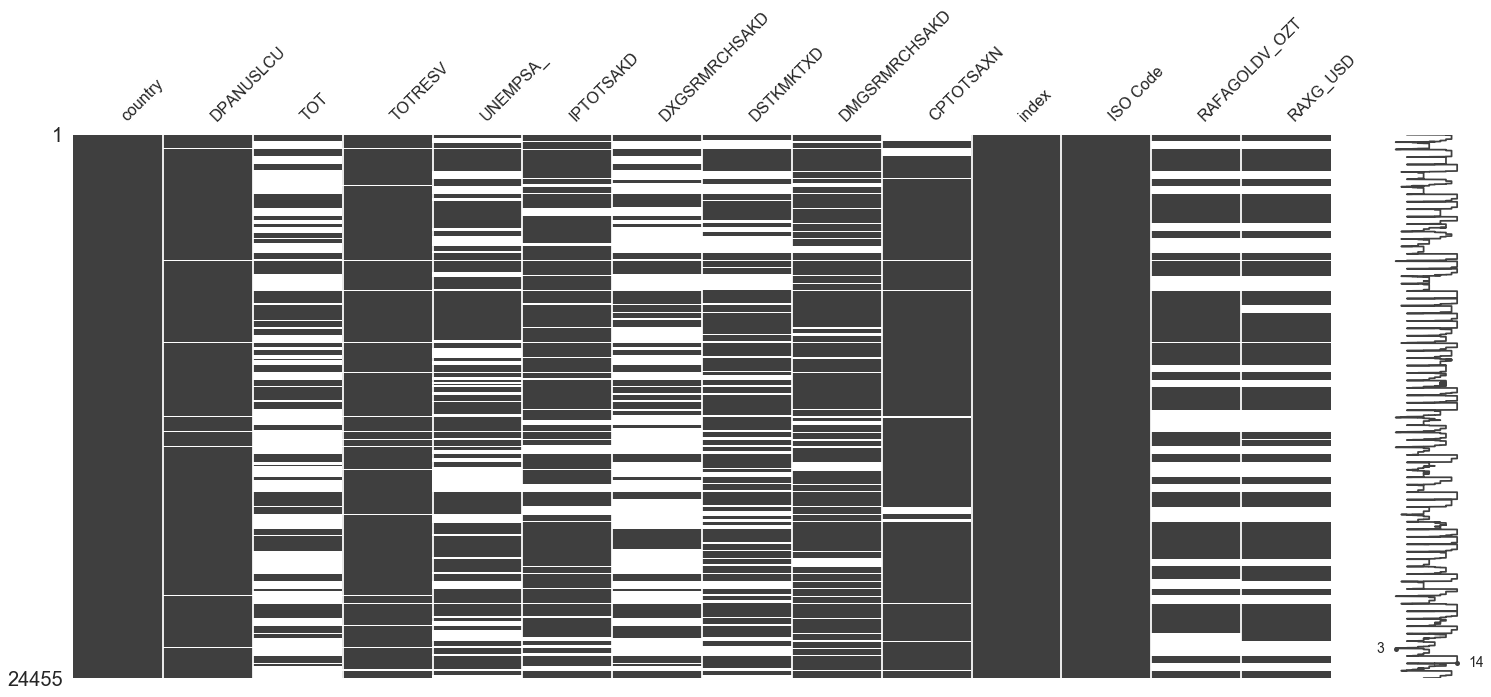

In [17]:
### missing data

import missingno as msno
msno.matrix(full_data)




In [16]:
full_data.head()

country  DPANUSLCU       TOT  TOTRESV  UNEMPSA_  \
ISO2 Code year                                                         
AR        2019M09  Argentina  56.087214       NaN      NaN       NaN   
          2019M08  Argentina  52.692227       NaN      NaN       NaN   
          2019M07  Argentina  42.509261       NaN      NaN       NaN   
          2019M06  Argentina  43.726100  0.982855      NaN       NaN   
          2019M05  Argentina  44.964109  0.990540      NaN       NaN   

                      IPTOTSAKD  DXGSRMRCHSAKD    DSTKMKTXD  DMGSRMRCHSAKD  \
ISO2 Code year                                                               
AR        2019M09           NaN            NaN  1134.540278            NaN   
          2019M08           NaN            NaN  1371.023570            NaN   
          2019M07           NaN            NaN  1764.233542            NaN   
          2019M06  6.882627e+09    5323.312495  1649.750587    4535.027172   
          2019M05  7.006597e+09    5562.557794  1434.453998    4563.856769   

                   CPTOTSAXN  index ISO Code RAFAGOLDV_OZT          RAXG_USD  
ISO2 Code year                                                                
AR        2019M09        NaN      4      ARG           NaN               NaN  
          2019M08        NaN      4      ARG   1.984963431  51158.1034677132  
          2019M07        NaN      4      ARG   1.984963431  64930.7078610265  
          2019M06        NaN      4      ARG   1.764963431  62018.5821029848  
          2019M05        NaN      4      ARG   1.984963431  62492.1787330216

In [ ]:
### Missing value imputation

## calling package impiute

import impyute as impy

df = impy.imputation.ts.locf(full_data['TOT'])

#For each set of missing indices, use the value of one row before(same column). 
#In the case that the missing value is the first row, look one row ahead instead.
#If this next row is also NaN, look to the next row. Repeat until you find a row in this #column that’s not NaN. 
#All the rows before will be filled with this value.

### Next steps: loop over dataframe and impute missing values by country and by variable.


In [21]:
### Creating potential output variables using HP filter

import statsmodels.api as sm
import pandas as pd
dta = sm.datasets.macrodata.load_pandas().data
index = pd.DatetimeIndex(start = '1959Q1', end = '2009Q4', freq = 'Q')
dta.set_index(index, inplace = True)

In [22]:
### Creating cycle and trend

cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)
gdp_decomp = dta[['realgdp']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leomf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


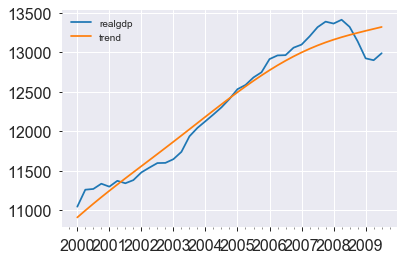

In [23]:
## Plotting potential gdp
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax = ax, fontsize = 16)
plt.show()

In [ ]:
### Next steps: loop over dataset and save potential output in an additonal column by country

stack = []
for col in dataoecd.columns:
    cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)
    stack.append(test)

In [ ]:
### Creating dictionary of variables 

dictionary = dict([('NYGDPMKTPKDZ','Annual GDP Growth 2010'), 
                   ('CC.EST','Control of Corruption Estimate'),
               ('RL.EST'    ,  'Rule of Law: Estimate'),
               ('RQ.EST'    ,   'Regulatory Quality: Estimate'),
               ('VA.EST'    ,   'Voice and Accountability: Estimate'),
              (' PV.EST'    ,   'Political Stability and Absence of Violence/Terrorism: Estimate'),
                  ('CORENS'       ,'Core CPI,not seas.adj'),
                ('CORESA'        ,'Core CPI,seas.adj'),
                ('CPTOTNSXN'    ,'CPI Price, nominal'),
                ('CPTOTSAXMZGY' ,'CPI Price, % y-o-y, median weighted, seas. adj.'),
                ('CPTOTSAXN'    ,'CPI Price, nominal, seas. adj.'),
                ('CPTOTSAXNZGY' ,'CPI Price, % y-o-y, nominal, seas. adj.'),
                ('DMGSRMRCHNSCD','Imports Merchandise, Customs, current US$, millions'),
                ('DMGSRMRCHNSKD','Imports Merchandise, Customs, constant US$, millions'),
                ('DMGSRMRCHNSXD','Imports Merchandise, Customs, Price, US$'),
                ('DMGSRMRCHSACD','Imports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DMGSRMRCHSAKD','Imports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DMGSRMRCHSAXD','Imports Merchandise, Customs, Price, US$, seas. adj.'),
                ('DPANUSLCU'    ,'Official exchange rate, LCU per USD, period average'),
                ('DPANUSSPB'    ,'Exchange rate, new LCU per USD extended backward, period average'),
                ('DPANUSSPF'    ,'Exchange rate, old LCU per USD extended forward, period average'),
                ('DSTKMKTXD'    ,'Stock Markets, US$'),
                ('DSTKMKTXN'    ,'Stock Markets, LCU'),
                ('DXGSRMRCHNSCD' ,'Exports Merchandise, Customs, current US$, millions'),
                ('DXGSRMRCHNSKD' ,'Exports Merchandise, Customs, constant US$, millions'),
                ('DXGSRMRCHNSXD' ,'Exports Merchandise, Customs, Price, US$'),
                ('DXGSRMRCHSACD' , 'Exports Merchandise, Customs, current US$, millions, seas. adj.'),
                ('DXGSRMRCHSAKD' ,'Exports Merchandise, Customs, constant US$, millions, seas. adj.'),
                ('DXGSRMRCHSAXD' ,'Exports Merchandise, Customs, Price, US$, seas. adj.'),
                ('EMBIG'        ,'J.P. Morgan Emerging Markets Bond Spread (EMBI+'),
                ('EMBIGI'       ,'J.P. Morgan Emerging Markets Bond Index(EMBI+'),
                ('IMPCOV'       ,'Foreign Reserves, Months Import Cover, Goods'),
                ('IPTOTNSKD'    ,'Industrial Production, constant US$'),
                ('IPTOTSAKD'    ,'Industrial Production, constant US$, seas. adj.'),
                ('NEER'         ,'Nominal Effecive Exchange Rate'),
                ('NYGDPMKTPSACD' ,'GDP,current US$,millions,seas. adj.'),
                ('NYGDPMKTPSACN' ,'GDP,current LCU,millions,seas. adj.'),
                ('NYGDPMKTPSAKD' ,'GDP,constant 2010 US$,millions,seas. adj.'),
                ('NYGDPMKTPSAKN' ,'GDP,constant 2010 LCU,millions,seas. adj.'),
                ('REER'          ,'Real Effective Exchange Rate'),
                ('RETSALESSA'    ,'Retail Sales Volume,Index,'),
                ('TOT'           ,'Terms of Trade'),
                ('TOTRESV'       ,'Total Reserves'),
                ('UNEMPSA_'      ,'Unemployment rate,Percent')
                  ])

In [ ]:
### Testing Dictionary 

dictionary['TOT']

## Dependent Variable and Sensitivity Analysis

In this section we are going to create different kinds of target (dependent) variables based on the research papers from the ECB.

i) Nominal Exchange Depreciation > 20%
ii) Sistemic Banking Crises


This tool is inteded to be flexible enough as to allow the inputation of different cenarios. 



In [ ]:
### building dependent variables and sensitivity analysis

# Create a new column called df.target where the value is 1
# if df.debt is greater than 90 and 0 if not
df['target'] = np.where(df['debt']>=50, '1', '0')

# nominal exchange rate depreciation

## monthly time series

### ten or twenty depreciation in a monthly 

# nominal exchange rate


### list of historical crises 


### Stationarity

This section is devoted to buid a tool for assessing stationarity in the dataframe´s time series.

In [ ]:
### stationarity and non stationarity discussion 
from statsmodels.tsa.stattools import adfuller
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        return 1
    else:
        return 0

In [ ]:
### Running stationarity tests in all collumns in dataframe

from statsmodels.tsa.stattools import adfuller

stack = []
for col in dataoecd.columns:
    test = adfuller(dataoecd[col])
    stack.append(test)


In [ ]:
### testing
stack

In [ ]:
### build indicators


In [ ]:
### Preparing machine learning pipeline 

from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [ ]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

In [ ]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [ ]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Feature Engineering 

Data Preprocessing

Numerical features preprocessing is different for tree and non tree model.

1) Usually:

Tree based models does not depend on scaling
Non-tree based models hugely depend on scaling
2) Most Often used preprocening are:

MinMax scaler to [0,1]
Standard Scaler to mean = 0 and std =1
Rank (We do not work on it in this data set)
Using np.log(1+data), np.sqrt(data) and stats.boxcox(data) (for exp dependency)
let's try some of them and see how our model prediction change by scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

Sometime scaling help to improve the prediction of tree based model so let's see

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

As we can see, the standarscaler and min and max effect on non tree models and the prediction results improve